In [85]:
#import das bibliotecas
from scipy.io import wavfile
from numpy.fft import fft, ifft, fftfreq, fftshift, ifftshift
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio as play


In [86]:
# obtendo taxa de amostragem e vetor de audio 
taxa_amostragem, audio = wavfile.read('01.wav')

# Numero de amostras no vetor do audio
N_amostras = len(audio)

# toca o audio com ruido
play(audio, rate=taxa_amostragem)

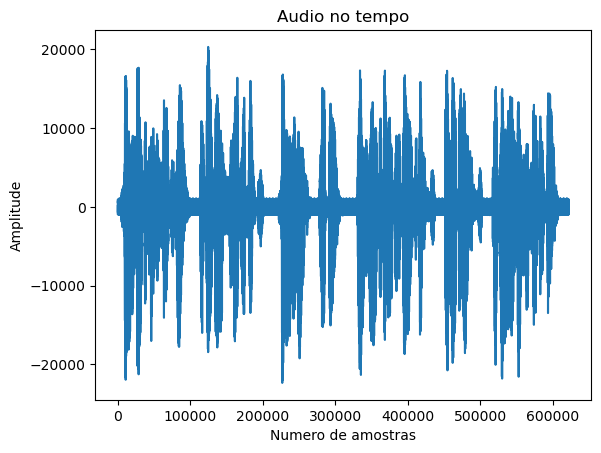

In [87]:
# plotando o audio no tempo
plt.plot(audio)
plt.title('Audio no tempo')
plt.xlabel('Numero de amostras')
plt.ylabel('Amplitude')
plt.show()

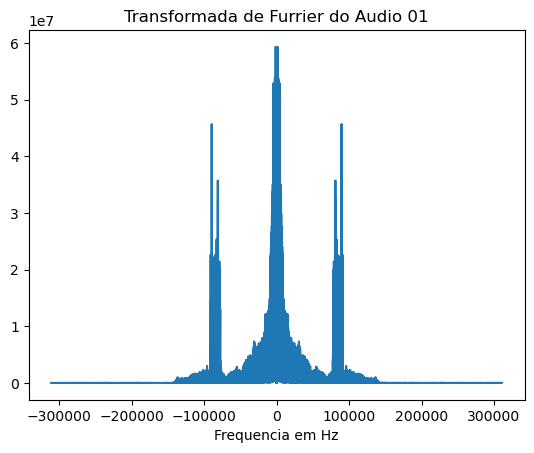

In [88]:
# organizando os elementos transformada de fourrier
    
audio_fft = fftshift(fft(audio))

# frequencias que compoem o audio 

audio_freqs = fftfreq(N_amostras, d = 1 / N_amostras)

# organizando as frequencias que compoem o audio, centrando no zero

audio_freqs = fftshift(audio_freqs) 

# plot do sinal no dominio da frequencia 

plt.plot(audio_freqs , np.abs(audio_fft))
plt.title("Transformada de Furrier do Audio 01")
plt.xlabel("Frequencia em Hz")
plt.show()

In [89]:
# fases dos elementos da tranformada do vetor Audio
    
audio_fft_phases = np.angle(audio_fft)


filtered_audio = audio_fft.copy()

# frequencia de corte  
Wc = 60000 # Hz

# Filtragem bruta na frequencia, elimina os elementos que estao fora da
# faixa de corte
    
for i in range(N_amostras):

    if np.abs(audio_freqs[i]) > Wc:

        filtered_audio[i] = 0


# coloca os elementos na ordem original, nao mais centrados na freq 0
    
recovered_audio_tempo = ifftshift(filtered_audio)

# transformada inversa de furrier e selecao da parte real 
    
recovered_audio_tempo = np.real(ifft(recovered_audio_tempo))

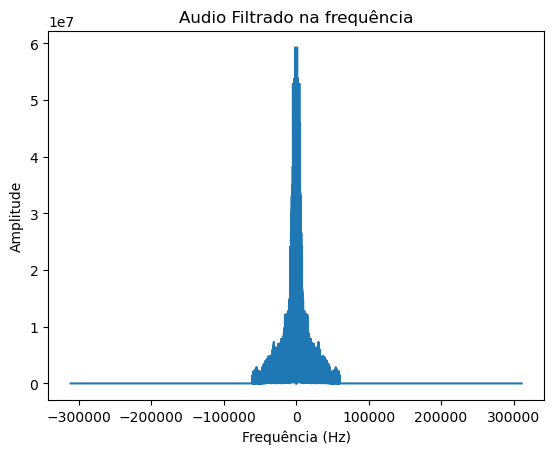

In [90]:
plt.plot(audio_freqs,np.abs(filtered_audio))
plt.title('Audio Filtrado na frequência')
plt.ylabel('Amplitude')
plt.xlabel('Frequência (Hz)')
plt.show()

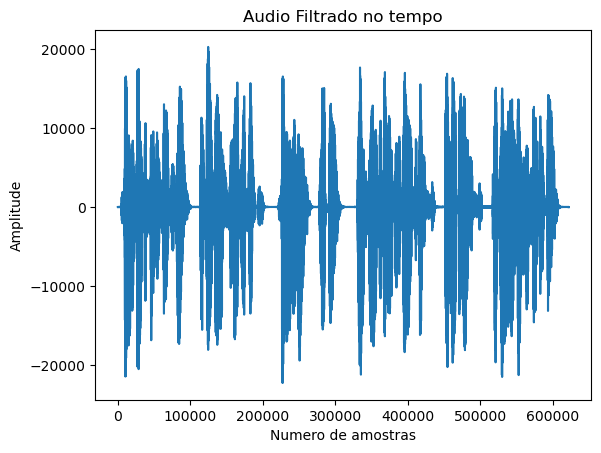

In [91]:
plt.plot(recovered_audio_tempo)
plt.title('Audio Filtrado no tempo')
plt.ylabel('Amplitude')
plt.xlabel('Numero de amostras')
plt.show()

In [92]:
wavfile.write("vec_audio.wav", taxa_amostragem, recovered_audio_tempo.astype(np.int16))
play("vec_audio.wav", rate=taxa_amostragem)